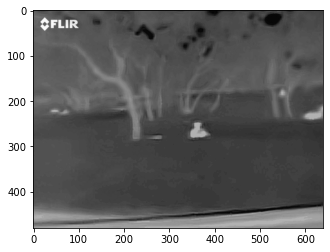

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:/Users/bluem/UTSA Research/bestdata/bestagain"
CATEGORIES = ["Lying", "Standing", "Faceon"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to dir for category
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    
        
        

In [12]:
print(img_array.shape)

(480, 640)


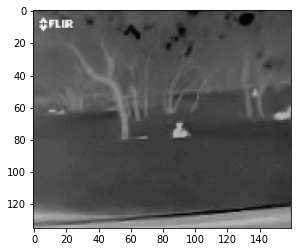

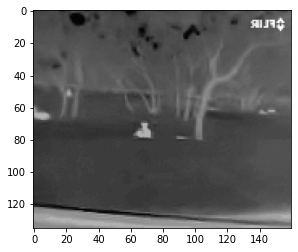

In [13]:



new_array = cv2.resize(img_array, (160, 135)) # image resizing to 200x200
plt.imshow(new_array, cmap='gray')
plt.show()
new_array = cv2.resize(img_array, (160, 135)) # image resizing to 200x200
new_array = cv2.flip(new_array, 1)
plt.imshow(new_array, cmap='gray')
plt.show()


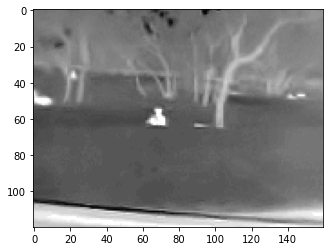

In [14]:
cropped_image = new_array[15:135, 0:160]
plt.imshow(cropped_image, cmap='gray')
plt.show()

In [15]:

# Create the training data set
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to dir for category
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (160, 135)) # image resizing to 200x200
                new_array = new_array[15:135, 0:160] # image cropping to remove the FLIR logo
                training_data.append([new_array, class_num])
                new_array = cv2.flip(new_array, 1)
                training_data.append([new_array, class_num])  
            except Exception as e:
                pass

create_training_data()


In [16]:
print(len(training_data)) # correct length got list of all images




222


In [17]:
import random

#training is a mutable list
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

2
1
1
2
2
2
2
1
1
2


In [18]:
X=[]
Y=[]
for features, label in training_data:
    X.append(features)
    Y.append(label)

# unable to pass a list to the neural network
X = np.array(X).reshape(-1, 120, 160, 1)
Y = np.array(Y)

In [19]:

# save the training set
import pickle

pickle_out = open("UNX.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("UNY.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()



In [20]:
# how to load in the training data
pickle_in = open("UNX.pickle", "rb")
X = pickle.load(pickle_in)
X[1]

array([[[123],
        [121],
        [122],
        ...,
        [116],
        [115],
        [116]],

       [[123],
        [122],
        [121],
        ...,
        [116],
        [116],
        [115]],

       [[123],
        [122],
        [122],
        ...,
        [115],
        [115],
        [115]],

       ...,

       [[151],
        [149],
        [149],
        ...,
        [150],
        [150],
        [150]],

       [[154],
        [157],
        [157],
        ...,
        [149],
        [150],
        [151]],

       [[157],
        [157],
        [157],
        ...,
        [156],
        [156],
        [156]]], dtype=uint8)

In [1]:
from platform import python_version
print(python_version())

3.9.7


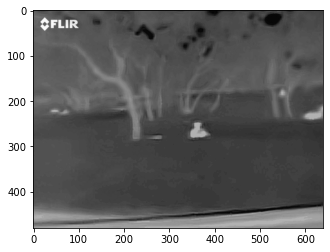

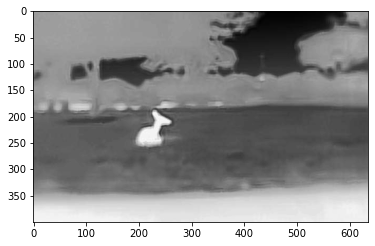

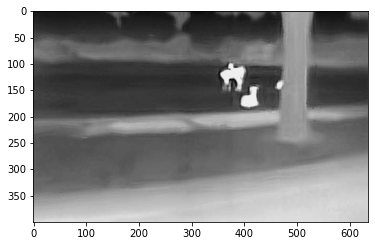

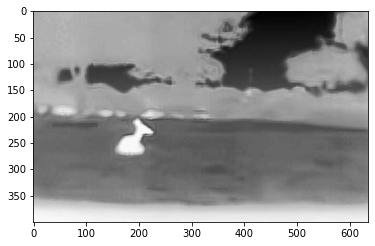

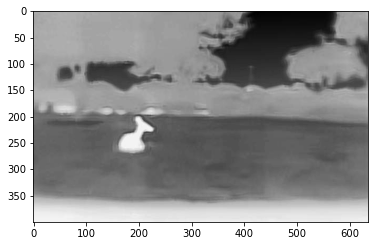

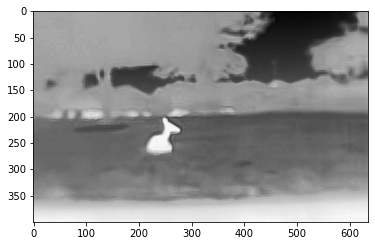

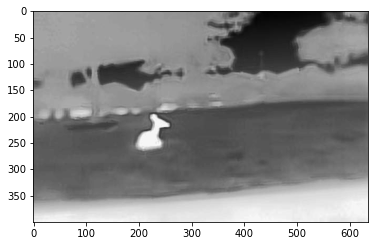

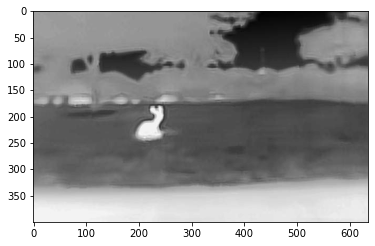

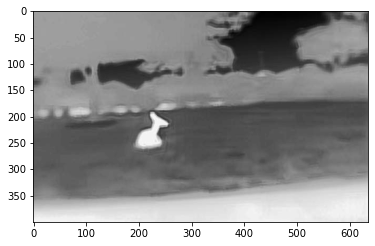

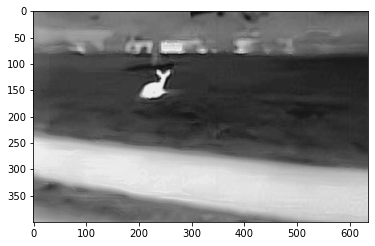

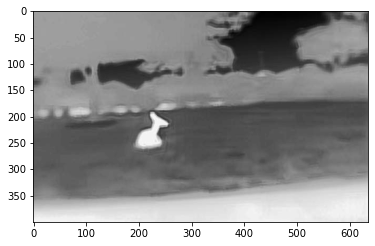

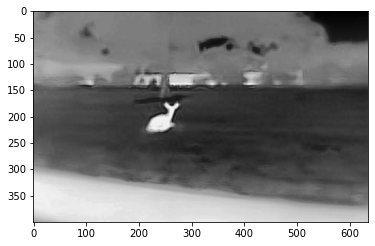

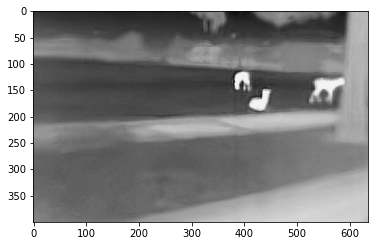

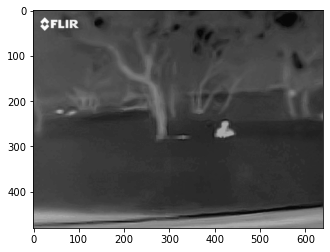

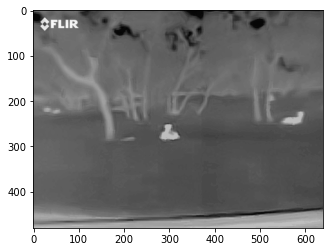

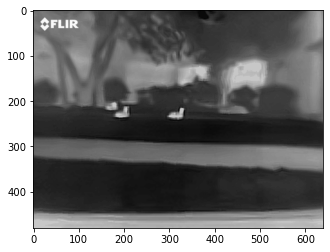

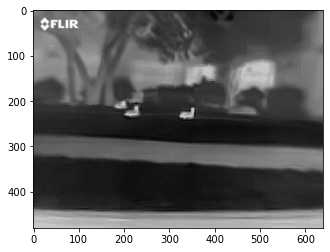

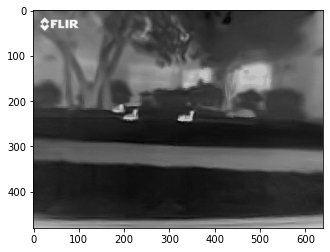

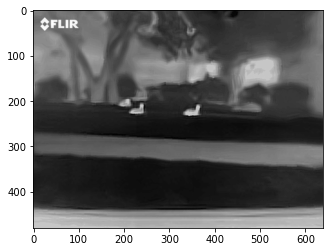

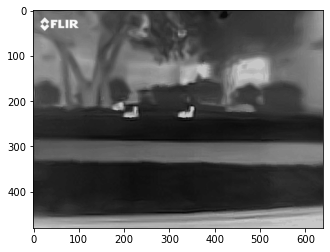

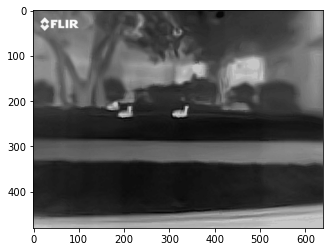

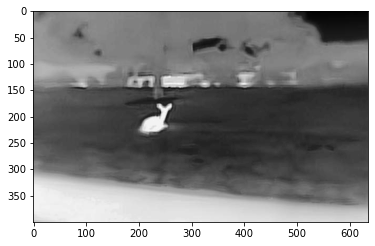

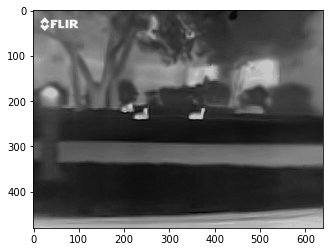

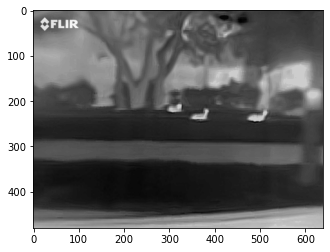

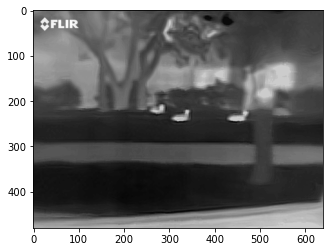

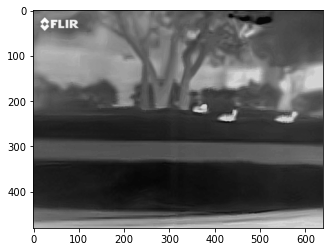

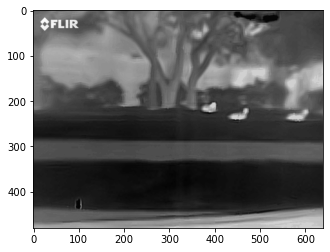

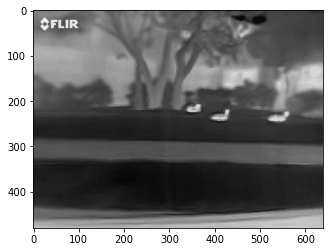

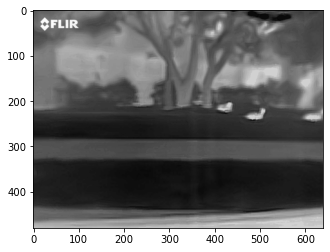

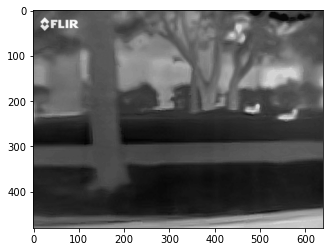

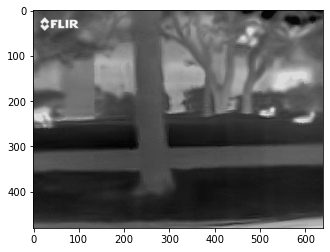

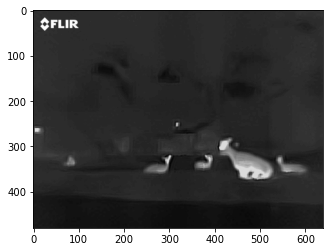

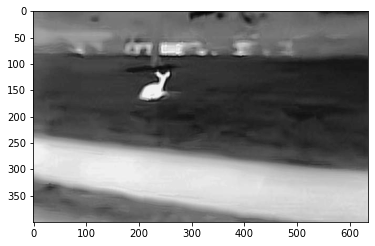

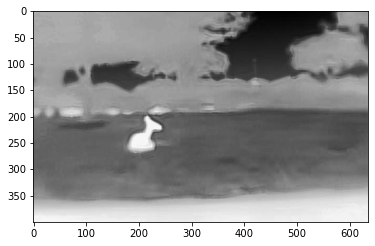

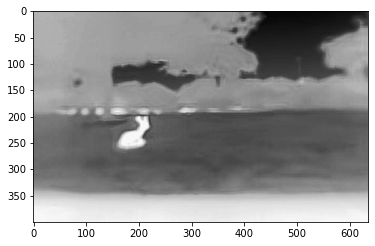

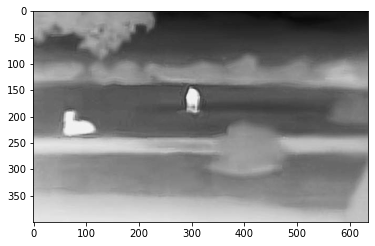

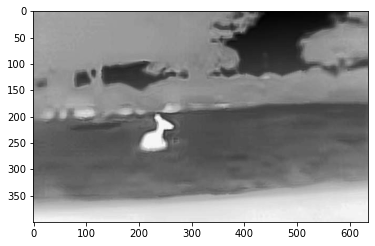

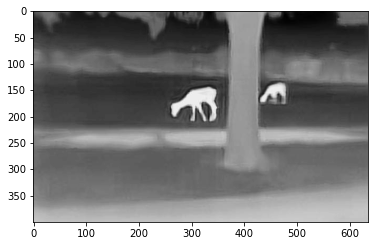

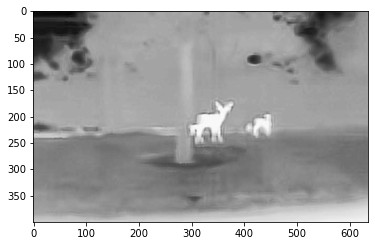

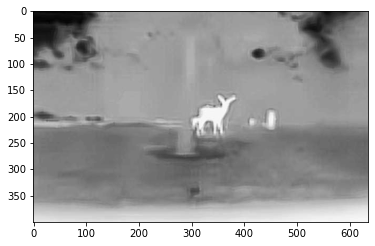

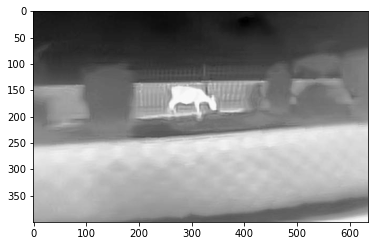

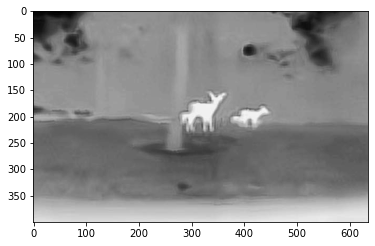

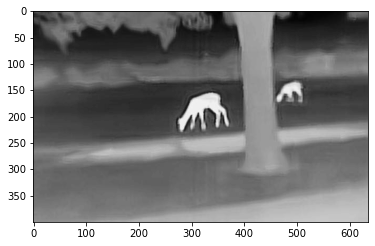

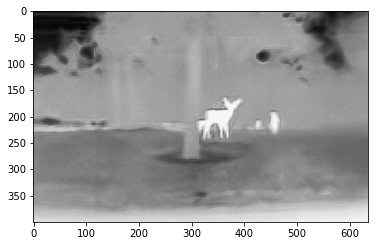

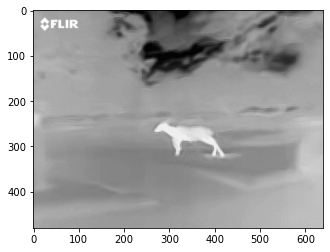

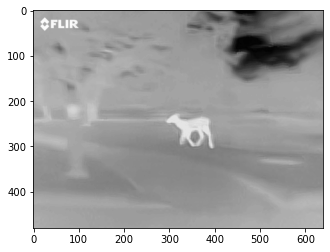

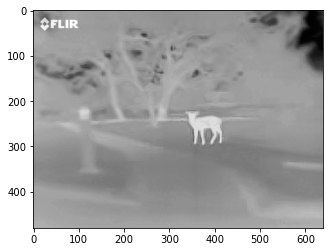

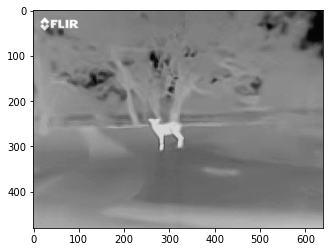

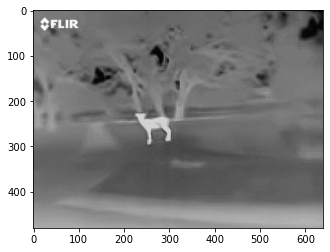

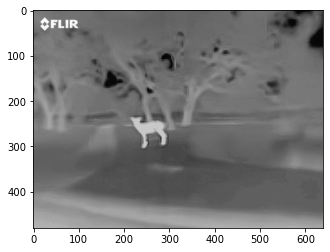

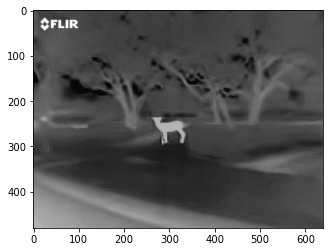

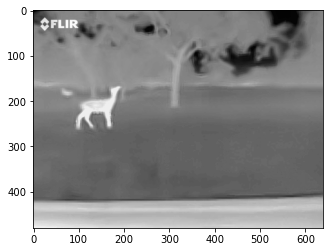

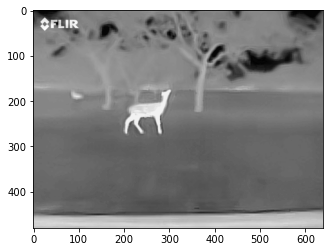

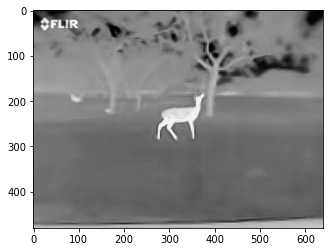

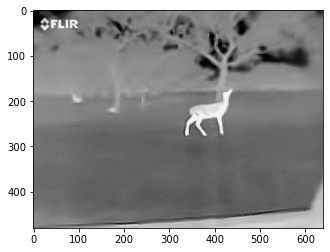

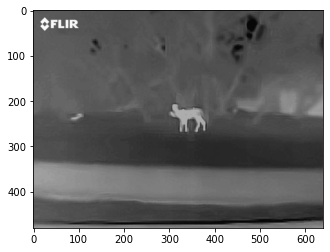

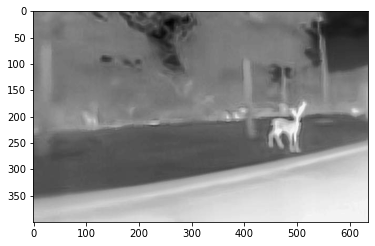

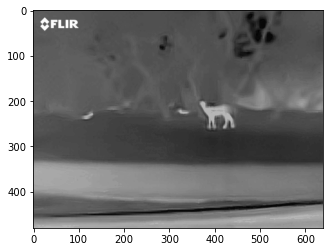

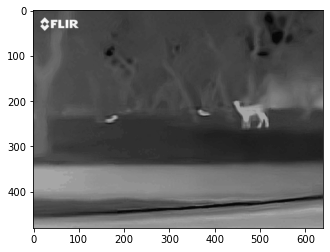

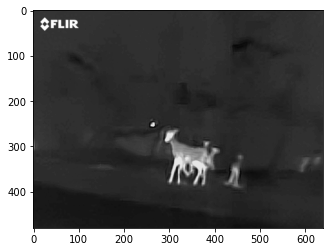

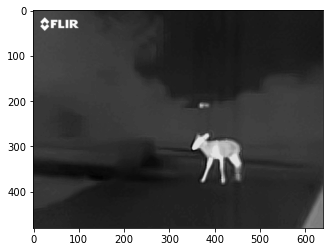

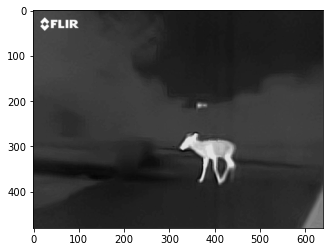

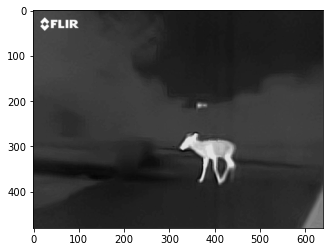

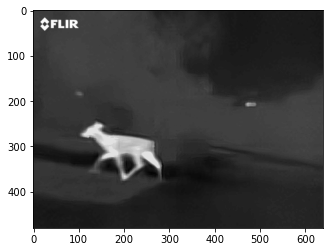

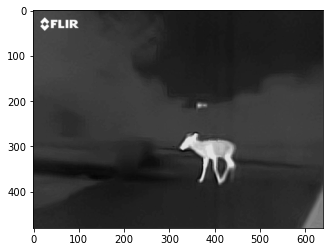

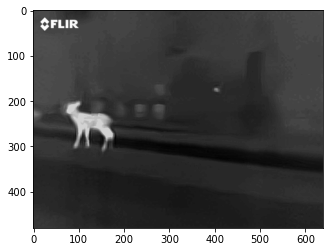

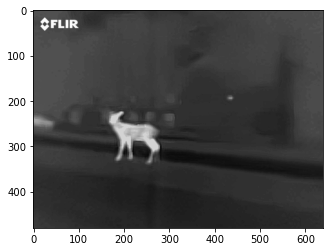

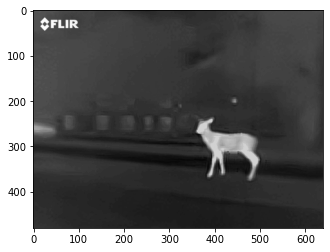

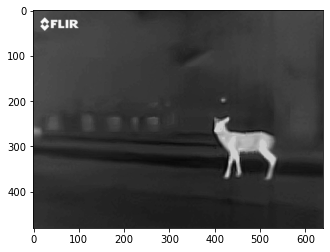

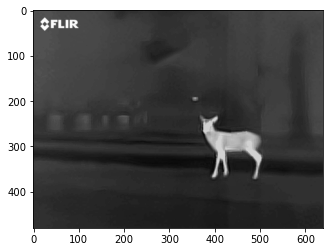

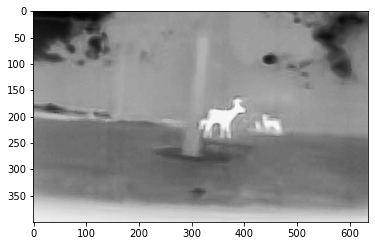

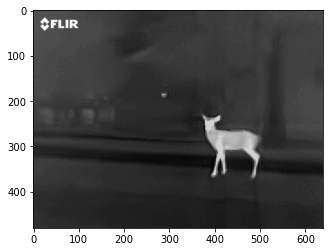

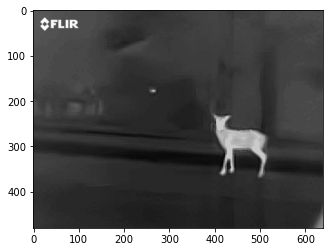

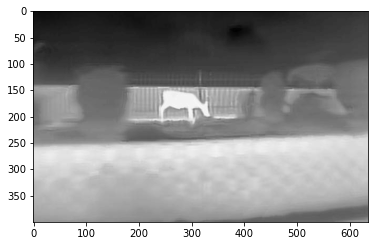

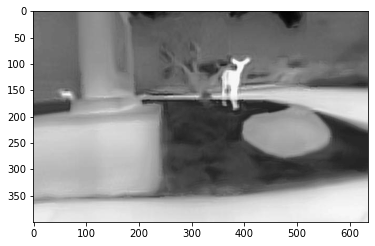

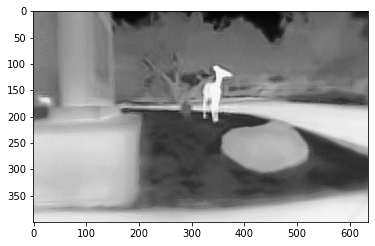

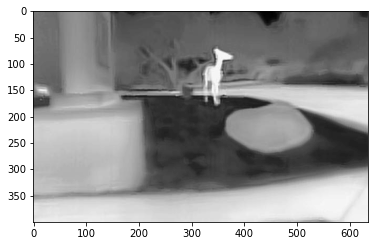

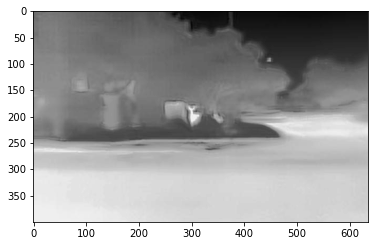

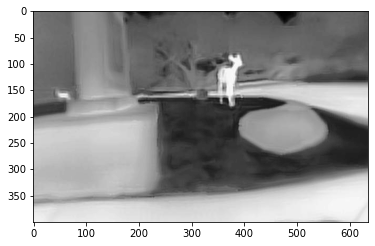

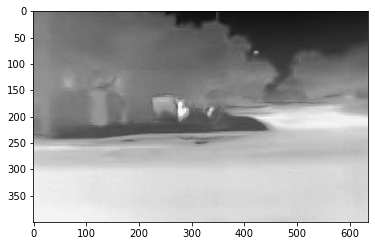

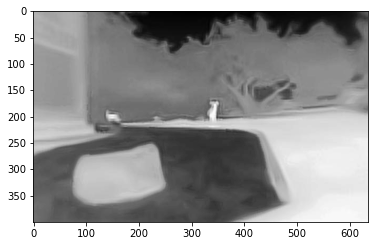

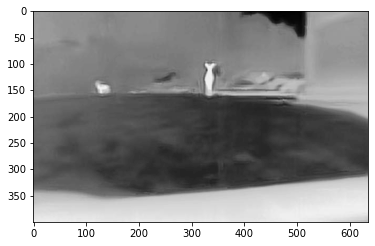

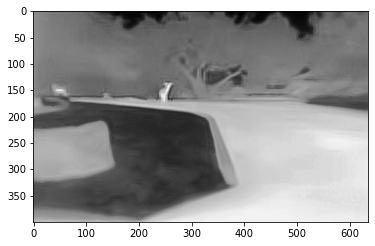

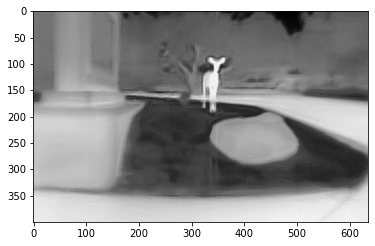

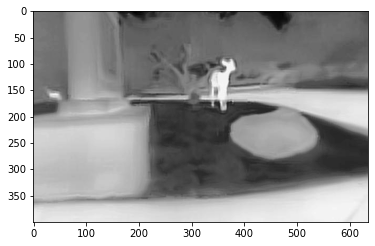

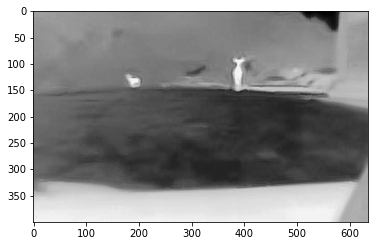

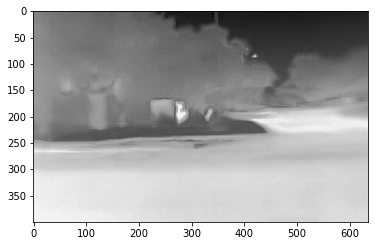

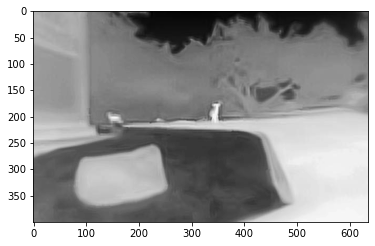

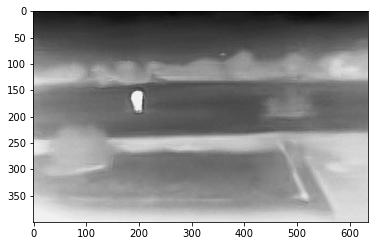

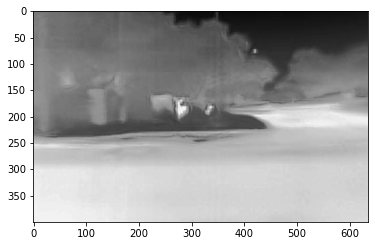

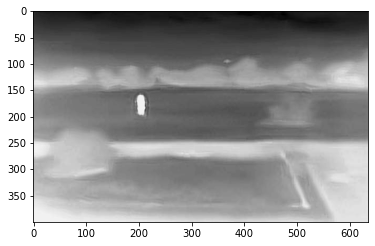

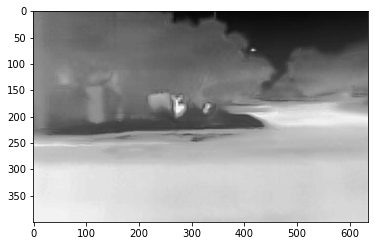

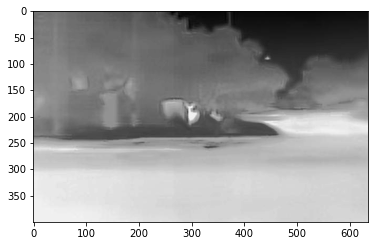

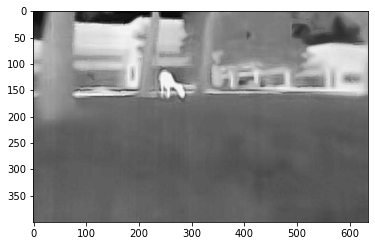

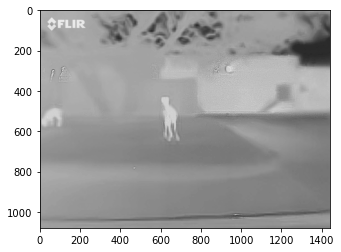

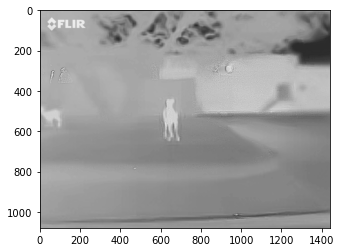

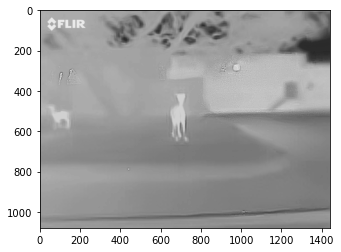

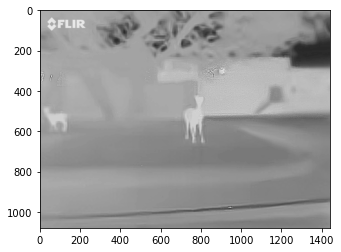

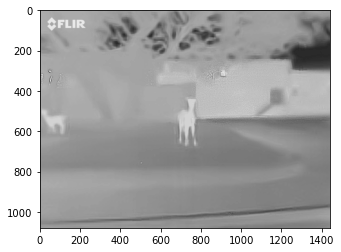

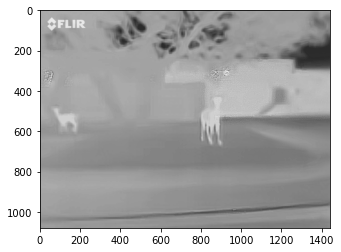

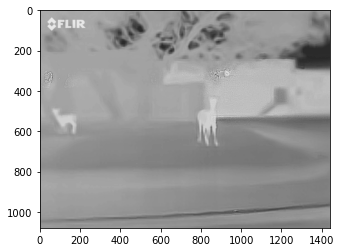

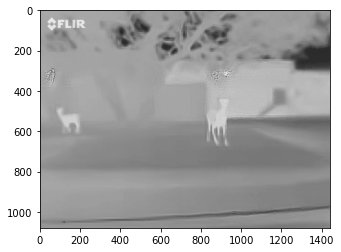

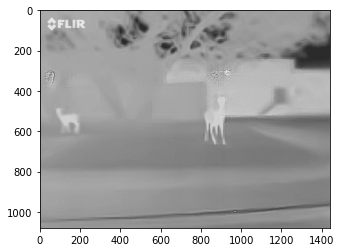

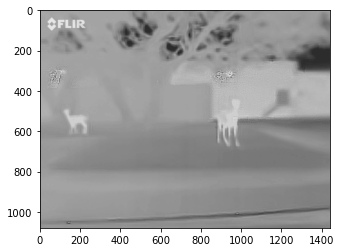

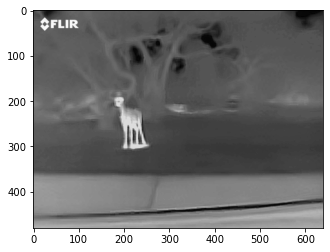

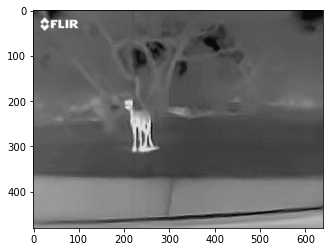

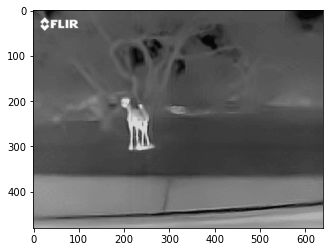

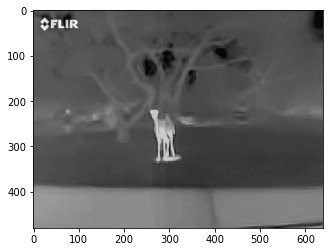

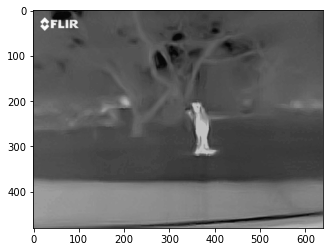

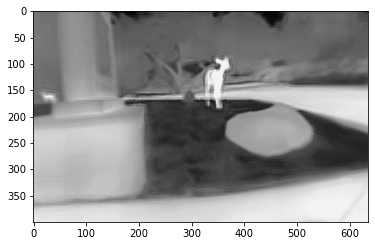

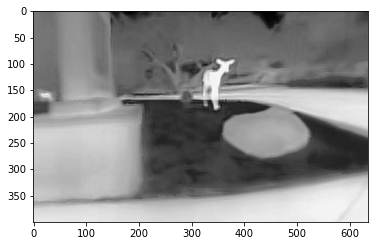

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:/Users/bluem/UTSA Research/bestdata/bestagain"
CATEGORIES = ["Lying", "Standing", "Faceon"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to dir for category
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
   
    

In [1]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
